<a href="https://colab.research.google.com/github/jasanchez19/LinearRegressionWithGradientDecentAndInputNormalization/blob/main/Homework1ECGR4105JorgeSanchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nbconvert
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [6]:
url= "https://raw.githubusercontent.com/jasanchez19/LinearRegressionWithGradientDecentAndInputNormalization/main/Housing.csv"
hf=pd.read_csv(url)
hf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
def compute_loss(X, Y, theta): 
    preds = X.dot(theta)
    errors = np.subtract(preds, Y)
    sqrErrors = np.square(errors)
    loss = 1 / (2 * samples) * np.sum(sqrErrors)
    return loss

def gradient_descent(X, Y, theta, lr, iterations): 
    history = np.zeros(iterations) 
    for i in range(iterations): 
        preds = X.dot(theta) #samples x 1 
        errors = np.subtract(preds, Y)  #samples x 1
        sum_delta = (lr / samples) * X.transpose().dot(errors); #(variables+1) x 1
        theta = theta - sum_delta; #(variables+1) x 1
        history[i] = compute_loss(X, Y, theta) 
 
    return theta, history

def gradient_descent_with_validation(X, Y, Xval, Yval, theta, lr, iterations): 
    history = np.zeros(iterations) 
    val_history = np.zeros(iterations)
    for i in range(iterations): 
        preds = X.dot(theta) #samples x 1 
        errors = np.subtract(preds, Y)  #samples x 1
        sum_delta = (lr / samples) * X.transpose().dot(errors); #(variables+1) x 1
        theta = theta - sum_delta; #(variables+1) x 1
        history[i] = compute_loss(X, Y, theta) 
        val_history[i] = compute_loss(Xval, Yval, theta)

    return theta, history, val_history

Problem 1

1a

In [25]:
lr = 0.1;

In [62]:
x = hf[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
Y = hf[['price']]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
y_train = y_train.values[:]
y_test = y_test.values[:]
theta = np.zeros(6)
theta = theta.reshape(6,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [28]:
x_train[0:5]

array([[1.00e+00, 6.72e+03, 3.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 4.00e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 3.60e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 5.30e+03, 4.00e+00, 2.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 7.50e+03, 4.00e+00, 2.00e+00, 2.00e+00, 3.00e+00]])

In [29]:
x_test[0:5]

array([[1.000e+00, 5.948e+03, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00],
       [1.000e+00, 4.040e+03, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00],
       [1.000e+00, 6.000e+03, 3.000e+00, 2.000e+00, 4.000e+00, 0.000e+00],
       [1.000e+00, 2.160e+03, 3.000e+00, 1.000e+00, 2.000e+00, 0.000e+00],
       [1.000e+00, 4.510e+03, 4.000e+00, 2.000e+00, 2.000e+00, 0.000e+00]])

In [23]:
y_train[0:5]

array([[6300000],
       [5873000],
       [8960000],
       [5040000],
       [2590000]])

In [24]:
y_test[0:5]

array([[3115000],
       [4123000],
       [4550000],
       [4473000],
       [4550000]])

In [35]:
iterations = 25
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iterations)
print("theta values, 1a regression: ",theta)
print("training loss history, 1a regression: ", train_loss)
print("validation loss history, 1a regression: ", val_loss)

theta values, 1a regression:  [[6.23164657e+161]
 [3.83225284e+165]
 [1.88614717e+162]
 [8.28385243e+161]
 [1.15099619e+162]
 [5.18886041e+161]
 [5.61366483e+161]
 [1.30281340e+161]
 [2.31368097e+161]
 [2.98625110e+160]
 [2.22870146e+161]
 [1.71478010e+161]]
training loss history, 1a regression:  [1.22397079e+026 1.25778213e+039 1.29252748e+052 1.32823265e+065
 1.36492414e+078 1.40262922e+091 1.44137587e+104 1.48119287e+117
 1.52210979e+130 1.56415701e+143 1.60736575e+156 1.65176811e+169
 1.69739704e+182 1.74428645e+195 1.79247114e+208 1.84198690e+221
 1.89287050e+234 1.94515973e+247 1.99889341e+260 2.05411144e+273
 2.11085483e+286 2.16916572e+299             inf             inf
             inf]
validation loss history, 1a regression:  [2.66492496e+025 2.73854157e+038 2.81419186e+051 2.89193195e+064
 2.97181954e+077 3.05391398e+090 3.13827622e+103 3.22496890e+116
 3.31405641e+129 3.40560490e+142 3.49968236e+155 3.59635864e+168
 3.69570553e+181 3.79779681e+194 3.90270829e+207 4.0105178

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


Text(0.5, 1.0, '1a Training Loss')

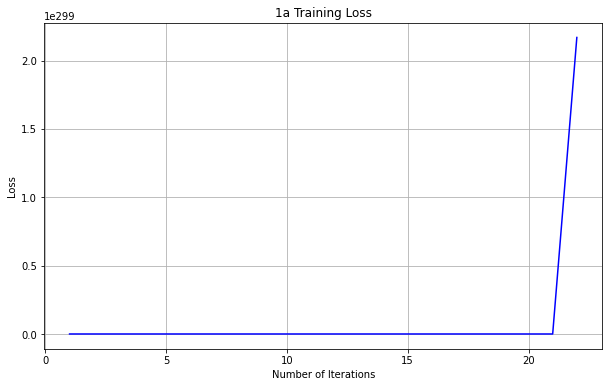

In [36]:
plt.plot(range(1, iterations + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('1a Training Loss')

Text(0.5, 1.0, '1a Validation Loss')

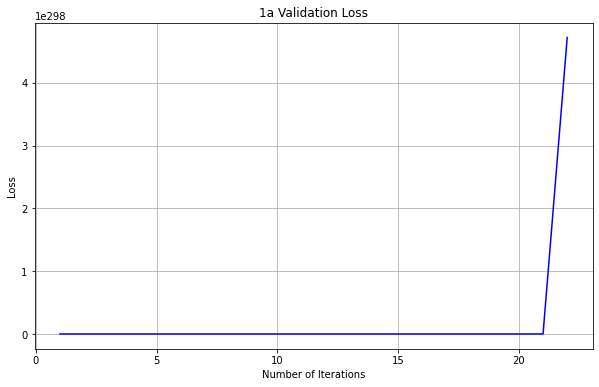

In [37]:
plt.plot(range(1, iterations + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('1a Validation Loss') 

1b

In [63]:
x = hf[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
x = pd.get_dummies(x,drop_first = True)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
y_train = y_train.values[:]
y_test = y_test.values[:]
theta = np.zeros(12)
theta = theta.reshape(12,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [65]:
iterations = 25
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iterations)
print("theta values for 1b regression: ",theta)
print("training loss history for 1b regression: ", train_loss)
print("validation loss history for 1b regression: ", val_loss)

theta values for 1b regression:  [[5.19885797e+161]
 [3.18013829e+165]
 [1.57034386e+162]
 [6.91650113e+161]
 [9.36146898e+161]
 [4.42253398e+161]
 [4.69476974e+161]
 [1.09635578e+161]
 [1.85735401e+161]
 [2.57042999e+160]
 [1.79924824e+161]
 [1.44686703e+161]]
training loss history for 1b regression:  [1.17614927e+026 1.19162343e+039 1.20730118e+052 1.22318520e+065
 1.23927820e+078 1.25558293e+091 1.27210217e+104 1.28883875e+117
 1.30579553e+130 1.32297540e+143 1.34038130e+156 1.35801621e+169
 1.37588313e+182 1.39398511e+195 1.41232526e+208 1.43090671e+221
 1.44973262e+234 1.46880622e+247 1.48813076e+260 1.50770955e+273
 1.52754593e+286 1.54764330e+299             inf             inf
             inf]
validation loss history for 1b regression:  [2.66270134e+025 2.69773352e+038 2.73322661e+051 2.76918667e+064
 2.80561984e+077 2.84253235e+090 2.87993050e+103 2.91782069e+116
 2.95620938e+129 2.99510314e+142 3.03450861e+155 3.07443253e+168
 3.11488171e+181 3.15586306e+194 3.19738359e+207 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


Text(0.5, 1.0, '1b Training Loss')

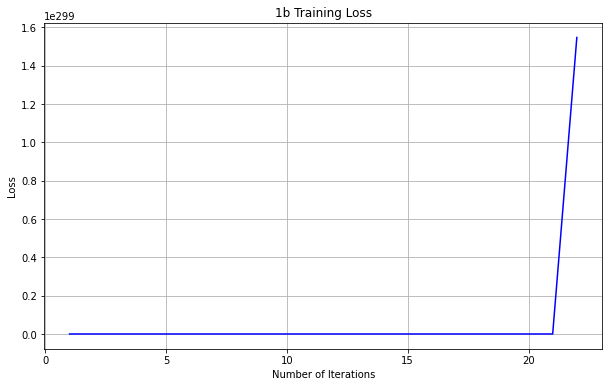

In [66]:
plt.plot(range(1, iterations + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('1b Training Loss')

Text(0.5, 1.0, '1b Validation Loss')

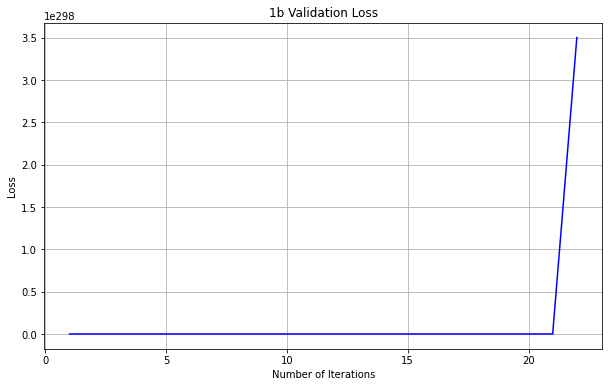

In [67]:
plt.plot(range(1, iterations + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('1b Validation Loss') 

Problem 2

2a

In [68]:
from sklearn import preprocessing
lr = 0.1

In [69]:
x = hf[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
standardizer = preprocessing.StandardScaler().fit(x)
x_std = standardizer.transform(x)
normalizer = preprocessing.Normalizer().fit(x)
x_norm = normalizer.transform(x)

In [70]:
x_std[0:5]

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  1.51769249],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  2.67940935],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  1.51769249],
       [ 1.08362412,  1.40341936,  1.42181174,  0.22441013,  2.67940935],
       [ 1.04672629,  1.40341936, -0.57018671,  0.22441013,  1.51769249]])

In [71]:
x_norm[0:5]

array([[9.99999700e-01, 5.39083396e-04, 2.69541698e-04, 4.04312547e-04,
        2.69541698e-04],
       [9.99999645e-01, 4.46428413e-04, 4.46428413e-04, 4.46428413e-04,
        3.34821310e-04],
       [9.99999894e-01, 3.01204787e-04, 2.00803192e-04, 2.00803192e-04,
        2.00803192e-04],
       [9.99999707e-01, 5.33333177e-04, 2.66666588e-04, 2.66666588e-04,
        3.99999883e-04],
       [9.99999773e-01, 5.39083436e-04, 1.34770859e-04, 2.69541718e-04,
        2.69541718e-04]])

In [73]:
Y = hf[['price']]
standardizer = preprocessing.StandardScaler().fit(Y)
y_std = standardizer.transform(Y)
y_norm = preprocessing.normalize(Y,axis=0)

In [74]:
y_std[0:5]

array([[4.56636513],
       [4.00448405],
       [4.00448405],
       [3.98575468],
       [3.55497918]])

In [75]:
y_norm[0:5]

array([[0.11127257],
       [0.1024879 ],
       [0.1024879 ],
       [0.10219507],
       [0.09546015]])

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(6)
theta = theta.reshape(6,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [85]:
iterations = 1500
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iterations)
print("Theta values, 2a, standardized regression: ",theta)
print("Training loss history, standardized regression: ", train_loss)
print("Validation loss history, 2a, standardized regression: ", val_loss)

Theta values, 2a, standardized regression:  [[0.01242109]
 [0.37330104]
 [0.07733309]
 [0.28877917]
 [0.25625813]
 [0.17804121]]
Training loss history, standardized regression:  [0.40839244 0.34450385 0.30296731 ... 0.21946227 0.21946227 0.21946227]
Validation loss history, 2a, standardized regression:  [0.0978361  0.08462826 0.0759252  ... 0.05487219 0.05487219 0.05487219]


Text(0.5, 1.0, '2a Standardized Set Training Loss')

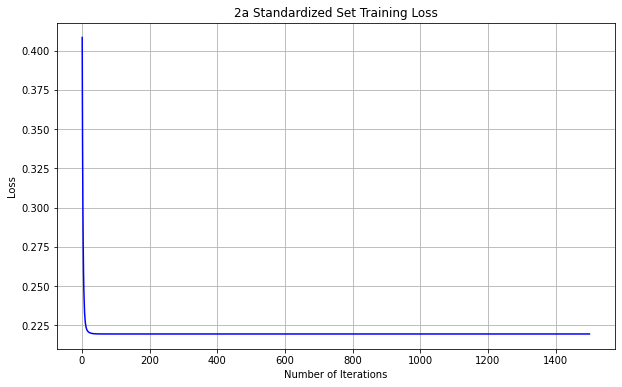

In [86]:
plt.plot(range(1, iterations + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('2a Standardized Set Training Loss')

Text(0.5, 1.0, '2a Standardized Set Validation Loss')

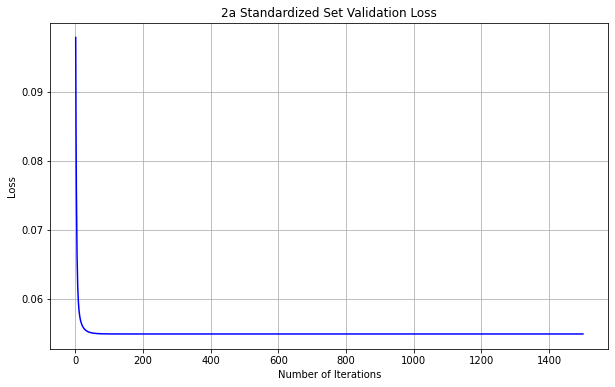

In [87]:
plt.plot(range(1, iterations + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('2a Standardized Set Validation Loss') 

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(6)
theta = theta.reshape(6,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [89]:
iterations = 1500
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iterations)
print("Theta values, 2a, normalized regression: ",theta)
print("Training loss history, 2a, normalized regression: ", train_loss)
print("Validation loss history, 2a, normalized regression: ", val_loss)

Theta values, 2a, normalized regression:  [[ 1.99321242e-02]
 [ 1.99323152e-02]
 [-2.03112046e-04]
 [-2.36195364e-05]
 [-3.07851530e-05]
 [ 8.00873109e-05]]
Training loss history, 2a, normalized regression:  [0.00063102 0.00044794 0.00033078 ... 0.00012248 0.00012248 0.00012248]
Validation loss history, 2a, normalized regression:  [1.58053612e-04 1.12159162e-04 8.27664557e-05 ... 3.02875937e-05
 3.02875937e-05 3.02875936e-05]


Text(0.5, 1.0, '2a Normalized Set Training Loss')

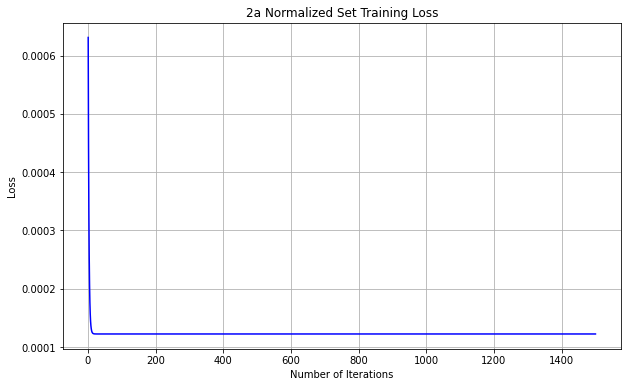

In [90]:
plt.plot(range(1, iterations + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('2a Normalized Set Training Loss')

Text(0.5, 1.0, '2a Normalized Set Validation Loss')

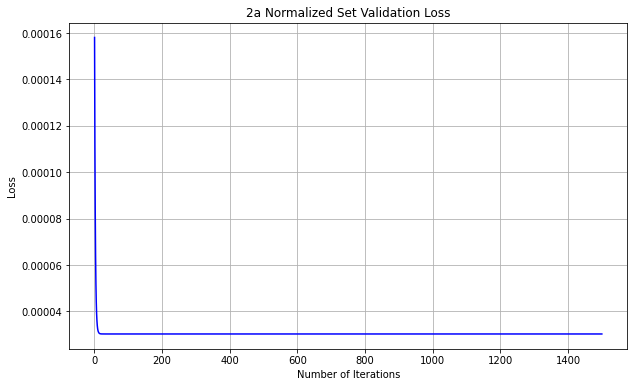

In [91]:
plt.plot(range(1, iterations + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('2a Normalized Set Validation Loss') 

2b

In [92]:
x = hf[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
x = pd.get_dummies(x,drop_first = True)
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420,4,2,3,2,1,0,0,0,1,1
1,8960,4,4,4,3,1,0,0,0,1,0
2,9960,3,2,2,2,1,0,1,0,0,1
3,7500,4,2,2,3,1,0,1,0,1,1
4,7420,4,1,2,2,1,1,1,0,1,0


In [93]:
standardizer = preprocessing.StandardScaler().fit(x)
x_std = standardizer.transform(x)
normalizer = preprocessing.Normalizer().fit(x)
x_norm = normalizer.transform(x)

In [94]:
pd.DataFrame(x_std[0:5])

,0,1,2,3,4,5,6,7,8,9,10
0,1.046726,1.403419,1.421812,1.378217,1.517692,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941
1,1.757010,1.403419,5.405809,2.532024,2.679409,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035
2,2.218232,0.047278,1.421812,0.224410,1.517692,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941
3,1.083624,1.403419,1.421812,0.224410,2.679409,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941
4,1.046726,1.403419,-0.570187,0.224410,1.517692,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035


In [95]:
pd.DataFrame(x_norm[0:5])

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.000539,0.000270,0.000404,0.000270,0.000135,0.000000,0.000000,0.0,0.000135,0.000135
1,1.0,0.000446,0.000446,0.000446,0.000335,0.000112,0.000000,0.000000,0.0,0.000112,0.000000
2,1.0,0.000301,0.000201,0.000201,0.000201,0.000100,0.000000,0.000100,0.0,0.000000,0.000100
3,1.0,0.000533,0.000267,0.000267,0.000400,0.000133,0.000000,0.000133,0.0,0.000133,0.000133
4,1.0,0.000539,0.000135,0.000270,0.000270,0.000135,0.000135,0.000135,0.0,0.000135,0.000000


In [101]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(12)
theta = theta.reshape(12,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [102]:
iterations = 1500
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iterations)
print("Theta values, 2b, standardized regression: ",theta)
print("Training loss history, 2b, standardized regression: ", train_loss)
print("Validation loss history, 2b, standardized regression: ", val_loss)

Theta values, 2b, standardized regression:  [[0.00713747]
 [0.31301165]
 [0.04846658]
 [0.28073616]
 [0.20592493]
 [0.13755795]
 [0.08743239]
 [0.05318803]
 [0.08947716]
 [0.08996967]
 [0.20719988]
 [0.14067724]]
Training loss history, 2b, standardized regression:  [0.37071055 0.28833988 0.24032342 ... 0.16527465 0.16527465 0.16527465]
Validation loss history, 2b, standardized regression:  [0.08181292 0.06411524 0.05382338 ... 0.03969169 0.03969169 0.03969169]


Text(0.5, 1.0, '2b Standardized Set Training Loss')

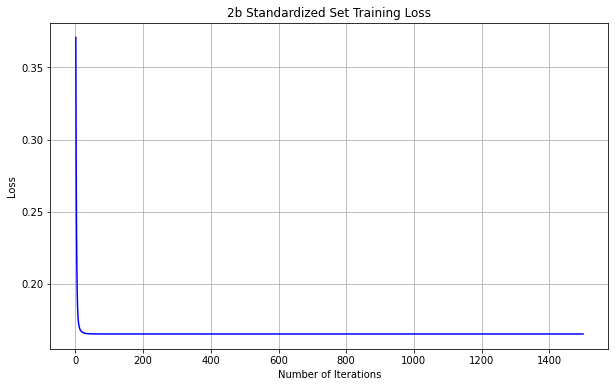

In [103]:
plt.plot(range(1, iterations + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('2b Standardized Set Training Loss') 

Text(0.5, 1.0, '2b Standardized Set Validation Loss')

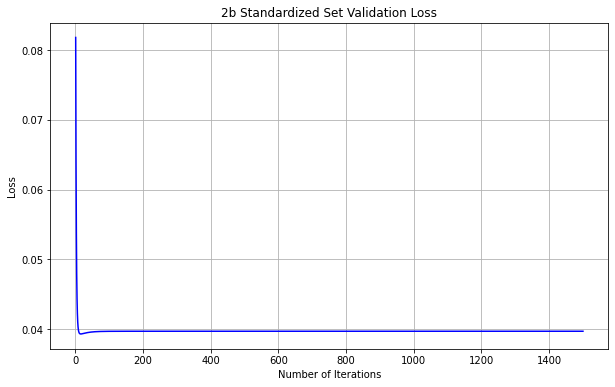

In [104]:
plt.plot(range(1, iterations + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('2b Standardized Set Validation Loss')

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(12)
theta = theta.reshape(12,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [106]:
iterations = 1500
theta,train_loss,val_loss = gradient_descent_with_validation(x_train,y_train,x_test,y_test,theta,lr,iterations)
print("Theta values, 2b, normalized regression: ",theta)
print("Training loss history, 2b, normalized regression: ", train_loss)
print("Validation loss history, 2b, normalized regression: ", val_loss)

Theta values, 2b, normalized regression:  [[ 2.00097539e-02]
 [ 2.00099707e-02]
 [-2.09396365e-04]
 [-2.93309633e-05]
 [-3.72627647e-05]
 [ 9.58293270e-05]
 [-3.65246758e-05]
 [ 3.00290485e-05]
 [ 9.19799148e-06]
 [ 3.97882759e-06]
 [ 6.61585764e-05]
 [ 2.62186256e-05]]
Training loss history, 2b, normalized regression:  [0.00063663 0.00045213 0.00033405 ... 0.00012413 0.00012413 0.00012413]
Validation loss history, 2b, normalized regression:  [1.51202601e-04 1.06193240e-04 7.75657627e-05 ... 2.86558930e-05
 2.86558929e-05 2.86558929e-05]


Text(0.5, 1.0, '2b Normalized Set Training Loss')

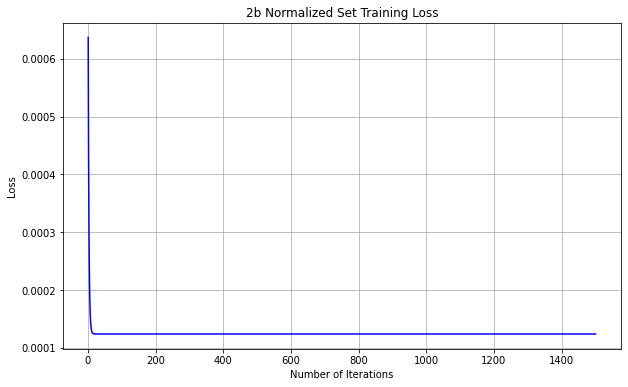

In [107]:
plt.plot(range(1, iterations + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('2b Normalized Set Training Loss') 

Text(0.5, 1.0, '2b Normalized Set Validation Loss')

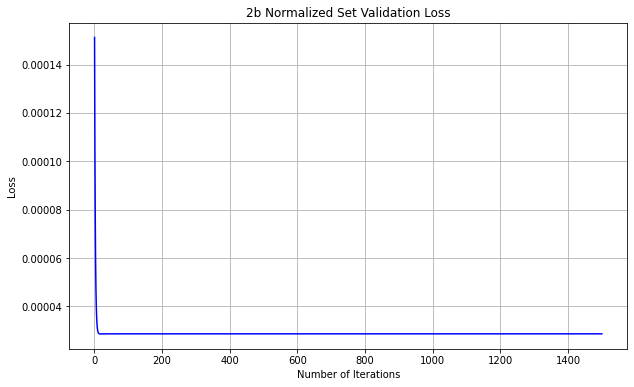

In [108]:
plt.plot(range(1, iterations + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('2b Normalized Set Validation Loss')

Problem 3

In [109]:
def gradient_descent_parameter_penalties(X, Y, Xval, Yval, theta, lr, iterations, Lambda): 
    history = np.zeros(iterations) 
    val_history = np.zeros(iterations)
    for i in range(iterations): 
        preds = X.dot(theta) #samples x 1 
        errors = np.subtract(preds, Y)  #samples x 1
        sum_delta = (lr / samples) * X.transpose().dot(errors) #(variables+1) x 1
        theta = (1-lr*Lambda/samples)*theta - sum_delta; #(variables+1) x 1
        history[i] = compute_loss(X, Y, theta) 
        val_history[i] = compute_loss(Xval, Yval, theta)

    return theta, history, val_history

3a

In [110]:
lr = 0.1
Lambda = 0.01

In [111]:
x = hf[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
standardizer = preprocessing.StandardScaler().fit(x)
x_std = standardizer.transform(x)
normalizer = preprocessing.Normalizer().fit(x)
x_norm = normalizer.transform(x)

In [112]:
y = hf[['price']]
standardizer = preprocessing.StandardScaler().fit(y)
y_std = standardizer.transform(y)
y_norm = preprocessing.normalize(y,axis=0)

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(6)
theta = theta.reshape(6,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [122]:
iterations = 1500
theta,train_loss,val_loss = gradient_descent_parameter_penalties(x_train,y_train,x_test,y_test,theta,lr,iterations,Lambda)
print("Theta values, 3a, normalized regression: ",theta)
print("Training loss history, 3a, normalized regression: ", train_loss)
print("Validation loss history, 3a, normalized regression: ", val_loss)

Theta values, 3a, normalized regression:  [[ 1.98215877e-02]
 [ 1.98217919e-02]
 [-2.05426988e-04]
 [-3.31314198e-05]
 [-3.88894503e-05]
 [ 9.41815980e-05]]
Training loss history, 3a, normalized regression:  [0.00062587 0.00044482 0.00032895 ... 0.00012295 0.00012295 0.00012295]
Validation loss history, 3a, normalized regression:  [1.64963098e-04 1.17825449e-04 8.73573948e-05 ... 2.98580409e-05
 2.98580409e-05 2.98580408e-05]


Text(0.5, 1.0, '3a Normalized Set Training Loss')

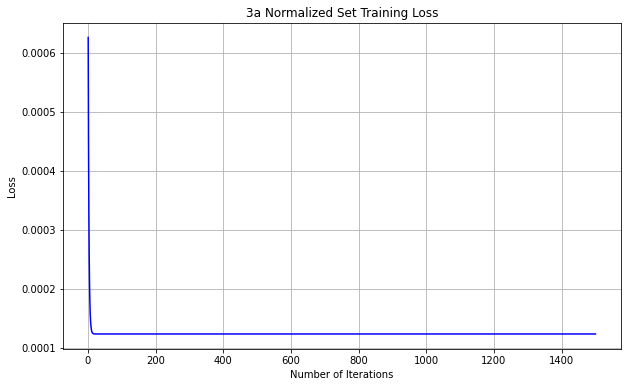

In [124]:
plt.plot(range(1, iterations + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('3a Normalized Set Training Loss') 

Text(0.5, 1.0, '3a Normalized Set Validation Loss')

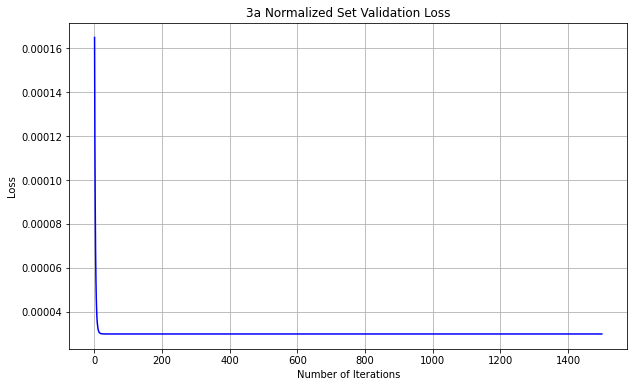

In [125]:
plt.plot(range(1, iterations + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('3a Normalized Set Validation Loss') 

3b

In [126]:
x = hf[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
        'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
x = pd.get_dummies(x,drop_first = True)
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,7420,4,2,3,2,1,0,0,0,1,1
1,8960,4,4,4,3,1,0,0,0,1,0
2,9960,3,2,2,2,1,0,1,0,0,1
3,7500,4,2,2,3,1,0,1,0,1,1
4,7420,4,1,2,2,1,1,1,0,1,0


In [127]:
standardizer = preprocessing.StandardScaler().fit(x)
x_std = standardizer.transform(x)
normalizer = preprocessing.Normalizer().fit(x)
x_norm = normalizer.transform(x)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size = 0.2)
samples = len(y_train)
test_samples = len(y_test)
x0_train = np.ones((samples, 1))
x_train = np.hstack((x0_train, x_train)) 
x0_test = np.ones((test_samples, 1))
x_test = np.hstack((x0_test, x_test)) 
theta = np.zeros(12)
theta = theta.reshape(12,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [129]:
iterations = 1500
theta,train_loss,val_loss = gradient_descent_parameter_penalties(x_train,y_train,x_test,y_test,theta,lr,iterations,Lambda)
print("Theta values, 3b, normalized regression: ",theta)
print("Training loss history, 3b, normalized regression: ", train_loss)
print("Validation loss history, 3b, normalized regression: ", val_loss)

Theta values, 3b, normalized regression:  [[ 2.00201416e-02]
 [ 2.00203325e-02]
 [-1.92428551e-04]
 [-2.17146347e-05]
 [-3.96489873e-05]
 [ 9.51113301e-05]
 [-3.03805600e-05]
 [ 3.23354073e-05]
 [ 1.91750849e-05]
 [ 4.98990326e-06]
 [ 6.57653389e-05]
 [ 2.95858219e-05]]
Training loss history, 3b, normalized regression:  [0.00063802 0.00045333 0.00033512 ... 0.00012498 0.00012498 0.00012498]
Validation loss history, 3b, normalized regression:  [1.49641547e-04 1.04753913e-04 7.62316778e-05 ... 2.78115385e-05
 2.78115385e-05 2.78115384e-05]


Text(0.5, 1.0, '3b Normalized Set Training Loss')

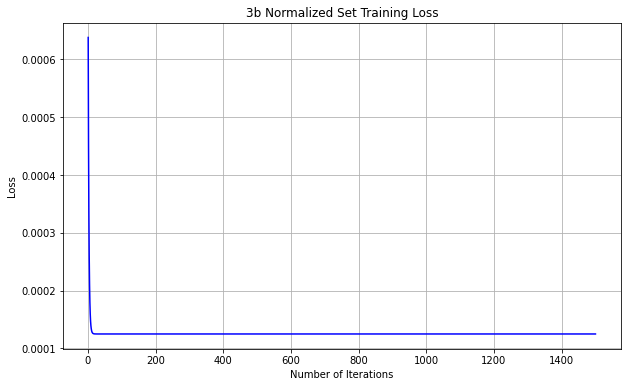

In [130]:
plt.plot(range(1, iterations + 1), train_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('3b Normalized Set Training Loss') 

Text(0.5, 1.0, '3b Normalized Set Validation Loss')

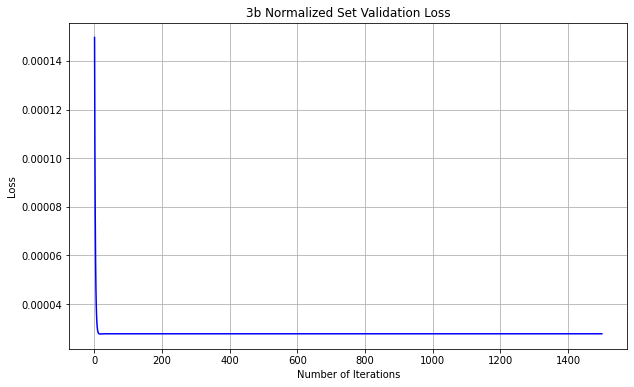

In [131]:
plt.plot(range(1, iterations + 1), val_loss, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of Iterations') 
plt.ylabel('Loss') 
plt.title('3b Normalized Set Validation Loss') 